In [56]:
import mod
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [57]:
def solve_1step(alpha,nu,psi,s,vertices):
    n=len(vertices)
    
    ## generar matriz
    M=np.zeros((n,n))
    
    for i in range(n):
        vecinos = vertices[i][2:]
        n_vecinos=len(vecinos)
        phi=0
        media = 0
        for vecino in vecinos:
            media+=s[vecino]
        media=media*1.0/n_vecinos

        if s[i] > media:
            phi=nu
        else:
            phi=1-nu
        M[i][i]=(psi*phi-1)*alpha    
        for j in vecinos:
            M[i][j]=alpha*(1.0/n_vecinos)*psi*(1-phi)
            
        
    val, vec = LA.eig(M)
    A_0=np.zeros((n,n))
    A_1=np.zeros((n,n))
    
    salto=[]
    t=10
    for i in range(n):
        if i not in salto:
            if np.imag(val[i]) != 0:
                j=np.argwhere(val == np.conj(val[i]))[0][0]
                salto.append(j)
                A_0[:,i]=np.real(vec[:,i])
                A_0[:,j]=np.imag(vec[:,j])
                A_1[:,i]=np.exp(t*np.real(val[i]))*(np.real(vec[:,i])*np.cos(t*np.imag(val[i]))-np.imag(vec[:,i])*np.sin(t*np.imag(val[i])))
                A_1[:,j]=np.exp(t*np.real(val[i]))*(np.real(vec[:,i])*np.sin(t*np.imag(val[i]))+np.imag(vec[:,i])*np.cos(t*np.imag(val[i])))
            else:
                A_0[:,i]=np.real(vec[:,i])
                A_1[:,i]=np.real(vec[:,i])*np.exp(t*np.real(val[i]))
                
    coef=np.linalg.solve(A_0, s)
    x_0=np.dot(A_0,coef)
    solucion=np.dot(A_1,coef)
    return solucion

In [58]:
vertices=mod.read("low_range.graph")[0]
x_0=np.random.rand(len(vertices))

In [62]:
t=10
S=np.zeros((len(vertices),t))
S[:,0]=x_0
for i in range(1,t):
    S[:,i]=solve_1step(1,0.75,0.98,S[:,i-1],vertices)

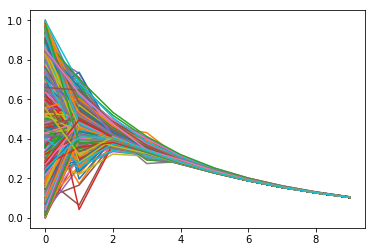

In [63]:
plt.plot(S[0:].T)
plt.show()

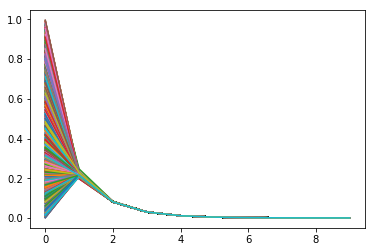

In [73]:
x_0=np.random.rand(len(vertices))
t=10
S=np.zeros((len(vertices),t))
S[:,0]=x_0
for i in range(1,t):
    S[:,i]=solve_1step(5,0.75,0.98,S[:,i-1],vertices)
plt.plot(S[0:].T)
plt.show()